## Finance and Quantum Computing

---

Implementing the Finance part of the lesson - https://www.youtube.com/watch?v=UtMVoGXlz04  
Done as part of the IBM Quantum Challenge Fall 2021

---

### The need for Quantum Computing in Finance

- Porfolio optimization of assets (to maximize the return and minimize the risk)  

We can't do this classically because they are NP Hard.  
In the near term, we can solve these with Variational Algorithms that use heuristics. With fault tolerant QCs,
we can implement algos like Grover Adaptive Search and get a quadratic speed up.

- Summation Problems like Option Pricing

These problems rely on Monte Carlo simulations which converge slowly for certain functions. The Quantum Amplitude Estimation
algorithm also provides a quadratic speedup with which we can solve this problem.

---

### The Qiskit Finance Module

Submodules of Qiskit Finance -
- <u>Applications</u>  
Can help solve Optimization (like Portfolio Optimization) and Estimation problems (like European Call Option or Fixed Income Pricing).

- <u>Circuits</u>  
Helps run the relevant circuits

- <u>Data Providers</u>   
With this we can load random data / historical stock market data to test our algorithms.

---

### Portfolio Optimization

We have a collection of assets, which is modelled by a probability distribution. We need to find a subset of these assets that maximizes our return and minimizes the risk. We can't include all the assets because some of them might have very high volatility.

<u>Asset Modelling</u>  
The assets are modelled with a multivariate probability distribution,  
\\[N( \overrightarrow{\mu}, \Sigma ) \\]
With input vector,
\\[ \overrightarrow{X_i} = ( X_1, X_2, ..., X_j, ..., X_n )  \\]  

<br>

<p style='text-align: center;'> Here, </p>
\\[\overrightarrow{\mu} = mean,\ \Sigma = covariance\ matrix \\]

<p style='text-align: center;'> of the multivariate normal distribution. </p>  
<br>

Each column stands for the value given to the asset in that input. The input space comprises of all possible ways we can invest in ***n*** assets.

Each asset ***j*** has its own univariate normal distribution, which means that it has its own mean/expectation value  
\\[ \mu_j = E[X_j]\\]  
\\[ where\ all\ X_j\ give\ N_j( \mu_j, \sigma_{jj} )\ \ where\ \sigma_{jj} = \Sigma_{jj} \ and \overrightarrow{\mu} = (\mu_1, \mu_2, ... \mu_j, ..., \mu_n) \\]  
\\[Note: \mu_j\ is\ the\ expected\ return\ for\ asset\ j,\ and\ \sigma_{jj}\ is\ the\ variance\ of\ asset\ j\\]

<br>

The covariance matrix tells us how an asset varies, and how change in one asset affects another.

\\[ \sigma_{ij}\ is\ the\ covariance\ between\ asset\ i\ and\ asset\ j \\]  
For positive covariance (and therefore, positive correlation), if asset <i>i</i> has a high value, then asset <i>j</i> also has a high value.    
For negative covariance (negative correlation), if asset <i>i</i> has a high value, then asset <i>j</i> has a lower value.  
Generally, if the correlation coefficient (which ranges from [-1,1]) lies within the range [-0.5,0.5] then the two variables are said to have low correlation.

Our goal is to find the input vector, **x*** that maximizes the assets and minimizes the risk. Or,  

\\[ \overrightarrow{x*} \ \ \epsilon \ \ argmax_{\overrightarrow{x}\epsilon \{0,1\}^n} \ \ (Return\_of\_assets(\overrightarrow{x}) - q . Risk\_in\_assets(\overrightarrow{x})) \\]  
Where ***q*** is the risk factor/risk appetite of the investor.
**x** is a binary vector where 0 represents not investing, and 1 represents investing into that asset.  

There are different ways of quantifying risk. We'll define it as the variance of the joint distribution.  
The asset vector we want is now given by,  
\\[ \overrightarrow{x*} \ \ \epsilon \ argmax_{\overrightarrow{x}} \ \ (\ E[\overrightarrow{x}^T.\overrightarrow{X}]\ -\ q. Var[\overrightarrow{x}^T.\overrightarrow{X}] \ ) \\]  

If the distribution is a normal distribution, the above equation can be written as,
\\[ \overrightarrow{x*} \ \ \epsilon \ argmax_{\overrightarrow{x}} \ \ (\ \overrightarrow{x}^T.\overrightarrow{\mu}\ -\ q.
\overrightarrow{x}^T \Sigma \overrightarrow{x} \ ) \\]

**X** is the total input space. Here, <i>sigma</i> is the covariance matrix and <i>T</i> is the transpose of a matrix.
The component on the right hand side of the minus sign shows that we're trying to solve a quadratic program.

---


In [1]:
"""
Quadratic Program Formulation
"""

import numpy as np

n = 3
mu    = np.array([2.5,4.2,1.0])
sigma = np.array([[1,0,-1],
                  [0,1,0.7],
                  [-1,0.7,1]])

# number of assets we can choose
budget = 2 

# typically lies between 
risk_factor = 0.7 

print("Quadratic Program -\n====================")
print("Number of Assets: ", n)
print("Mean return of all assets:\n", mu)
print("\nVariance-Covariance Matrix:\n", sigma)
print("\nBudget: ", budget)
print("Risk Factor: ", risk_factor)

print("\nProcess Complete!")

Quadratic Program -
Number of Assets:  3
Mean return of all assets:
 [2.5 4.2 1. ]

Variance-Covariance Matrix:
 [[ 1.   0.  -1. ]
 [ 0.   1.   0.7]
 [-1.   0.7  1. ]]

Budget:  2
Risk Factor:  0.7

Process Complete!


In [2]:
from qiskit_finance.applications.optimization import PortfolioOptimization

popt = PortfolioOptimization(expected_returns=mu, covariances=sigma, risk_factor=risk_factor, budget=budget)

qp = popt.to_quadratic_program()
print(qp)

print("Process Complete!")

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Portfolio optimization

Minimize
 obj: - 2.500000000000 x_0 - 4.200000000000 x_1 - x_2 + [ 1.400000000000 x_0^2
      - 2.800000000000 x_0*x_2 + 1.400000000000 x_1^2 + 1.960000000000 x_1*x_2
      + 1.400000000000 x_2^2 ]/2
Subject To
 c0: x_0 + x_1 + x_2 = 2

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1

Binaries
 x_0 x_1 x_2
End

Process Complete!


In [3]:
# Solving it first with a Classical Algorithm
# It will work fast in this case since the state space is small

from qiskit_optimization.algorithms import CplexOptimizer

cplex_optimizer = CplexOptimizer()
cplex_result = cplex_optimizer.solve(qp)

print(cplex_result)
print("Process Complete!")

optimal function value: -5.300000000000001
optimal value: [1. 1. 0.]
status: SUCCESS
Process Complete!


---

### Variational Quantum Eigensolver

The Goal is to find ground state psi of the Hamiltonian H  
The idea is to choose model phi(theta) that can approximate psi and minimize energy

\\[ \theta * = argmin_{\theta}E(\theta) = argmin_{\theta} <\phi(\theta)| H |\phi(\theta)>  \\]


There will be a feedback loop between a Quantum Processor and a Classical Processor. The classical processor suggests new
input parameters, while the quantum processor uses these input parameters to evaluate the hamiltonian which is classically hard to solve.

With special H, we can solve quadratic unconstrained binary optimizations (QUBOs)
Basically, this quadratic program can be reformulated to a Ground State Search problem. The quadratic program is set to find the minimum value of the objective function. The input vectors which contain 0's and 1's get mapped to spin variables. Then, the Pauli Z operator is applied to all these spin variables. Then, we get the Hamiltonian whose ground state is the same as the optimal solution. 

So, if our answer was column vector [0,1,0,0] then it would get converted to [1,-1,1,1] in the first step. After the second step, we would get,  
\\[ |\psi> = |\uparrow\downarrow\uparrow\uparrow> \\]  





(Short screenshot snippet on this)

---

### Solving the Quadratic Program with the VQE

The mean, covariance matrix, risk factor, etc. first get fed into the PortfolioOptimzation function. Then, the Quadratic Program is modelled. The quadratic program is passed on to the Minimum Eigen Optimizer, which converts the program to a hamiltonian. Then, the quantum algorithm subroutine (VQE) finds the ground state of this hamiltonian, which gives us the final result.


---


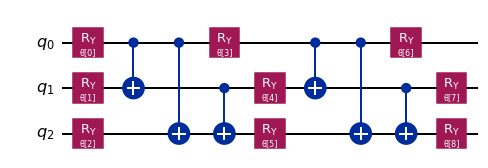

In [4]:
from qiskit import Aer
from qiskit.circuit.library import RealAmplitudes # model |phi(theta)>

"""
This circuit can produce states whose amplitudes are real. This is because our Hamiltonian is diagonal 
and its ground state will have only real amplitudes. Not using one that supports complex values to 
reduce the degrees of freedom of states which is easier to optimize
"""

sim = Aer.get_backend('qasm_simulator')

ansatz = RealAmplitudes(3, reps=2)
ansatz.decompose().draw('mpl', style='iqx')

In [5]:
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP   # Stochastic Optimizer
from qiskit_optimization.algorithms import MinimumEigenOptimizer

vqe = VQE(ansatz, optimizer=SLSQP(), quantum_instance=sim)
vqe_optimizer = MinimumEigenOptimizer(vqe)

# The MinimumEigenOptimizer internally maps our quadratic program to an Ising Hamiltonian,
# along with the reverse mapping as well
vqe_result = vqe_optimizer.solve(qp)
print(vqe_result)
print("Process Complete!")

"""
We get the same result as the classical aLgorithm
The performance strongly depends on the variational form and classical optimizer
"""

optimal function value: -5.300000000000001
optimal value: [1. 1. 0.]
status: SUCCESS
Process Complete!


'\nWe get the same result as the classical aLgorithm\nThe performance strongly depends on the variational form and classical optimizer\n'

In [6]:
"""
Running it on a real QC

With the Qiskit Runtime environment we can speed up iterative algorithms like the VQE

[phase this better]
Originally, you would have to create a job locally and send it to IBM cloud.
The job would then go to the quantum backends, wait for its turn and get executed. This result is then sent back to the 
cloud and then to your local system.

Instead of doing that, Qiskit allows you to send the entire algorithm to the cloud, which will get queued up and executed.

"""
from qiskit_optimization.runtime import VQEProgram # VQEProgram will soon be called VQEClient

provider = # ...
backend = # ... set this up as normal

vqe = VQEProgram(anstaz, optimize=SLSQP(), provider=provider, backend=backend)
vqe_optimizer = MinimumEigenOptimizer(vqe)

vqe_result = vqe_optimizer.solve(qp)
print(vqe_result)
print("Process Complete")

# 53 minutes

SyntaxError: invalid syntax (<ipython-input-6-17703067c107>, line 16)

---

### Option Pricing

A Financial Option is the right to buy or sell an asset for a certain price in a certain time window.
The Option Pricing model is used to evaluate equity value to securities.  
The European Call Option is one such type. You have one single asset, and in a fixed maturity time T, you can buy the asset for a fixed price K. The price of the asset after time T is called the Spot Price.

The question we want to solve is - is it worth it? What is our expected payoff? We can solve this using the Payoff Function, which tells us the gain we can get. It does this using the Spot Price and the Strike Price. If the price of the asset is below the Strike Price, then the asset lost its value. If you buy the asset for the Strike Price, K, then we would have bought the asset under the market value.  

We want to calculate the payoff, which, in this example, is the expectation of the following piecewise linear function.  
\\[ payoff\  =\  E[\ max(S_r - K, O)\ ] \\]

We can solve this using Monte Carlo Estimation, where we take a large number of samples, and then average it. This gives us the estimate of the expected value. The error of the Monte Carlo estimation converges to 1/sqrt(N) where N is the number of samples (or mu). This algo is too slow for complicated functions.  

---

### Quantum Amplitude Estimation

This algorithm helps us solve the Option Pricing problem in much lesser time.  

Given an operator A,  
\\[ |\psi>\ =\ A |0>\ =\ \sqrt{1 - a}\ |\psi_0> + \sqrt{a}\ |\psi_1>   \\]

State psi_0 is the 'bad' state, while state psi_1 is the 'good' state. We want to find the probability of measuring the good state (which is <i>a</i>)  
\\[ a\ =\ |<\psi_1|\psi_1>|^2 \\]

You can solve this by converting operator A to operator Q, whose eigenvalues depend on the amplitude <i>a</i>  
Since this is a Unitary Operator, the eigenvalue will be a complex phase, which can be estimated with the phase estimation algorithm. From the estimated phase we can recover the required amplitude.  
Amplitude Estimation has a much better convergence (quadratic speedup), which is 1/M, where M is the number of samples.  

Can we write the amplitude <i>a</i> as the expectation of some function?  
If we can do this, then we can obtain the quadratic speedup. The following definiton of expectation is used,
\\[ a\ =\ E[\ f(x)\ ]\ =\ \int_{x}^{} f(x).p(x)\,dx\ =\ \sum_{i=1}^{M} f(x_i).p(x_i) \\]

The structure of our A operator is as follows,  
\\[ A|0>\ =\ \sum_{i} \sqrt{p(x_i)}\ \big(\sqrt{1-f(x_i)}\ |x_i>|0> + \sqrt{f(x_i)}\ |x_i>|1>\big) \\]
The root(p(x_i)) part is the probability distribution of our assets. The root(1-f(x_i)) and root(f(x_i)) part is the payoff function (for this problem, is the above piecewise linear function).  

The circuit has 2 main blocks. The first block loads the probability distribution, while the second block implements the payoff function.

---



In [7]:
from qiskit_finance.circuit.library import EuropeanCallPricingObjective # F
from qiskit.circuit.library import LogNormalDistribution # Probability Distribution

"""
The accuracy of this approximation depends on the approximation of the integral, which depends on the number of qubits we
use to represent the probability distribution (3 in this case)
"""

num_uncertainty_qubits = 3

"""
Using the Black-Scholes model to analytically compute the probability distribution of an asset at time T.
"""

strike_price = 1.896 # Price that we've agreed upon
T = 40 / 365         # 40 days to mature

S   = 2.0            # Initial Spot Price
vol = 0.4            # Volatility of 40%
r   = 0.05           # Annual Interest rate of 4%

# Resulting parameters for log-normal distribution
mu = ( (r - 0.5 * vol ** 2) * T + np.log(S) )
sigma = vol * np.sqrt(T)
mean = np.exp(mu+sigma**2/2)
variance = (np.exp(sigma**2) - 1) * (2 * mu + sigma**2)
stddev = np.sqrt(variance)

# Lowest and Highest value considered for spot price. In between, an equidistant discretization is considered
low = np.maximum(0, mean-3*stddev)
high = mean + 3 * stddev

distribution = LogNormalDistribution(num_uncertainty_qubits, mu=mu, sigma=sigma**2, bounds=(low,high))

print("Process Complete!")

Process Complete!


<ipython-input-7-fa68f9cebb1d>:33: DeprecationWarning: `LogNormalDistribution` is deprecated as of version 0.17.0 and will be removed no earlier than 3 months after the release date. It moved to qiskit_finance.circuit.library.LogNormalDistribution.
  distribution = LogNormalDistribution(num_uncertainty_qubits, mu=mu, sigma=sigma**2, bounds=(low,high))


---

### Eurpoean Call Option

Now we can define our European Call Option. The probability distribution gets created using the maturity date and the asset model. The distribution and the strike price form the European Call Pricing. This gives us the Estimation Problem, which can be solved by our Amplitude Estimation algorithm. The algorithm solves the quadratic program and gives us the result.

---

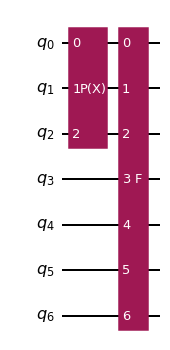

In [8]:
from qiskit_finance.applications import EuropeanCallPricing

european_call_pricing = EuropeanCallPricing(num_state_qubits  = num_uncertainty_qubits, 
                                            strike_price      = strike_price,
                                            rescaling_factor  = 0.25, # approximation constant for payoff function
                                            bounds            = (low,high),
                                            uncertainty_model = distribution)

problem = european_call_pricing.to_estimation_problem()

problem.state_preparation.draw('mpl', style='iqx')

In [9]:
# Iterative Amplitude Estimation is one of the fastest
from qiskit.algorithms import IterativeAmplitudeEstimation

epsilon = 0.01
alpha   = 0.05

ae = IterativeAmplitudeEstimation(epsilon, alpha=alpha, quantum_instance=sim)

result = ae.estimate(problem)

print("Estimated Value: ", result.estimation_processed)                 # 0.1585
print("Confidence Inverval: ", result.confidence_interval_processed)    # 0.1459, 0.1711

# This means that we can expect a payoff of 0.15 dollars
# We can say with 95% probability that the payoff lies in the interval  (0.1459, 0.1711)

print("Process Complete!")

Estimated Value:  0.15853296900121114
Confidence Inverval:  (0.14596956859822036, 0.17109636940420184)
Process Complete!


---

The European Call Option can be solved classically, but there are many options like American Options, Path Dependent Options or Autocallables which are difficult to solve classically. With Quantum Computers we can hope to solve these problems efficiently. 

---

### Conclusion

In this notebook, we've explored 2 possible applications of Quantum Computers. One is for optimization problems like Portfolio Optimization

[write summary later]


---

To Do:
* Give a short note on the finance stuff
* Short note on the hamiltonian
* Photo screenshot snippets from YT video
* Write note on how you can play with various distributions and see which suits the problem best
